<h1 style="font-family:cursive; font-size:18px;background-color: #70dbdb;color:black;text-align:center;padding: 8px">Loan Eligibility Prediction</h1>

<h1 style="font-family:cursive; font-size:14px;color:#008080;text-align:left;padding: 4px">9. Missing Value Treatment</h1>

<h1 style="font-family:cursive; font-size:10px;color:#008080;text-align:left;padding: 4px">I. Random Forest Imputation using Missingpy Library</h1>

 <div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:80%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            MissForest is  machine learning-based data imputation algorithm that operates on the Random Forest algorithm.First, the missing values are filled in using median/mode imputation. Then, we mark the missing values as ‘Predict’ and the others as training rows, which are fed into a Random Forest model trained to predict
        </p>
    </div>
    
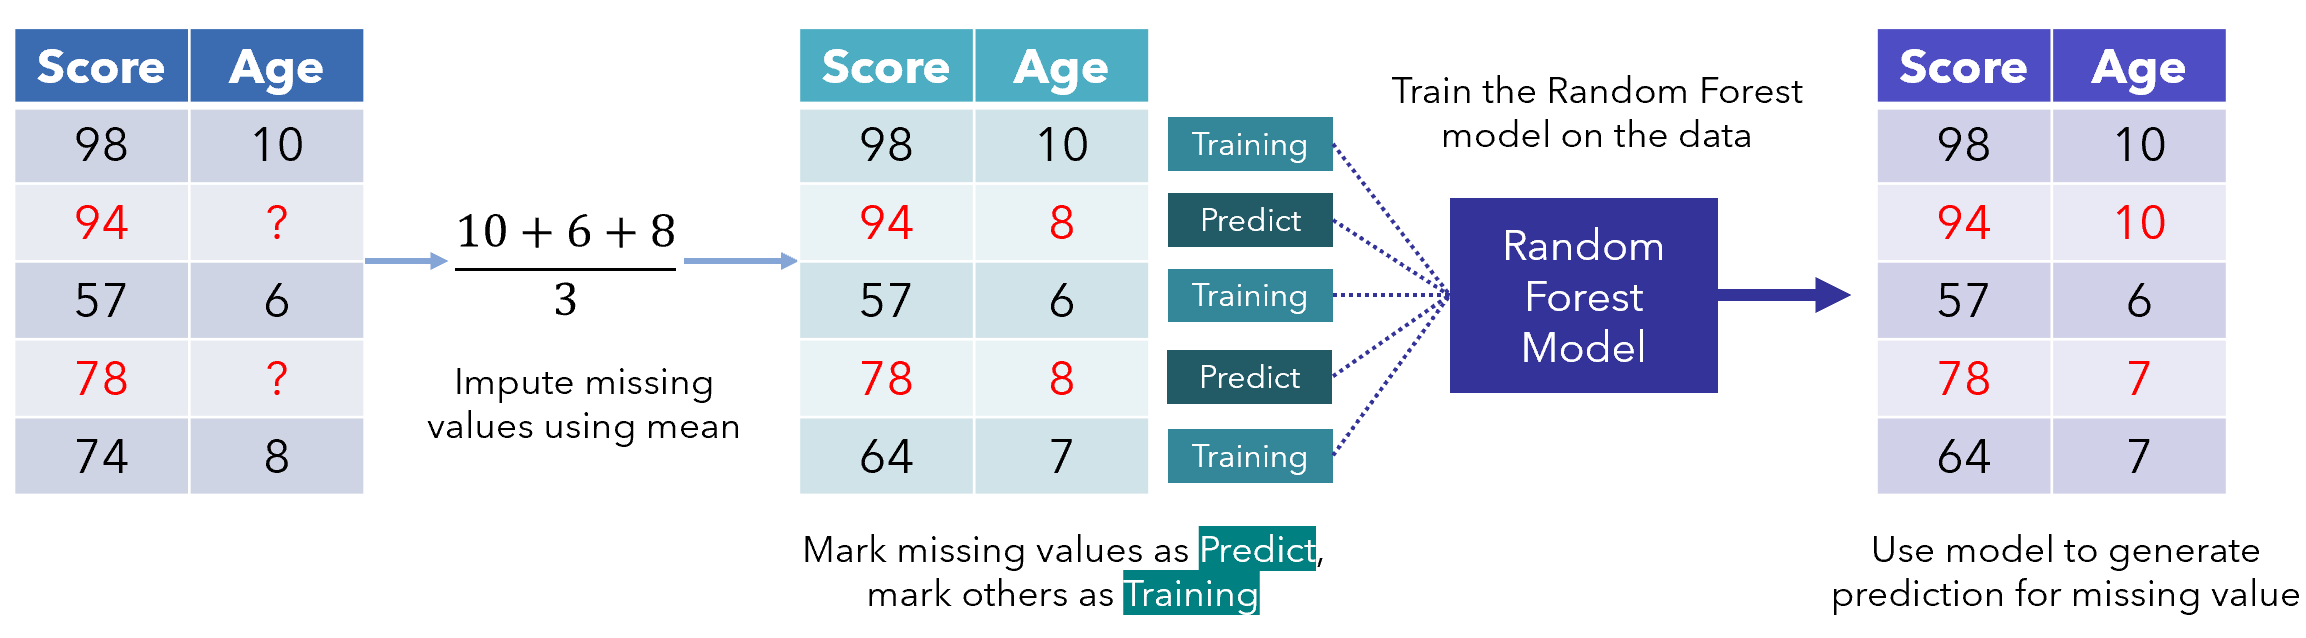

 <div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:80%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            This process of looping through missing data points repeats several times, each iteration improving on better and better data. It’s like standing on a pile of rocks while continually adding more to raise yourself: the model uses its current position to elevate itself further.The model may decide in the following iterations to adjust predictions or to keep them the same.
        </p>
    </div>

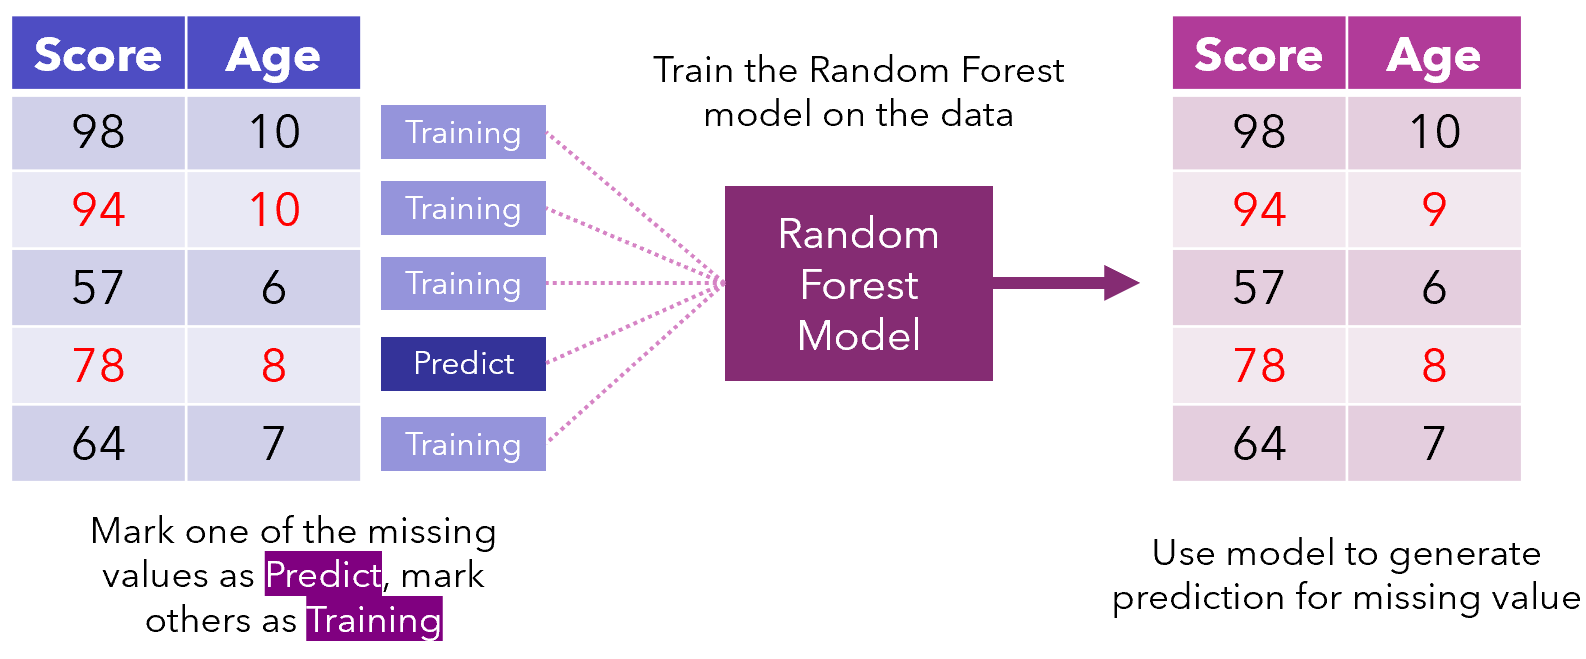

In [33]:
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

<IPython.core.display.Javascript object>

In [34]:
from missingpy import MissForest

In [35]:
X=train[["Current Loan Amount","Annual Income","Monthly Debt","Maximum Open Credit","Credit Score",
         "Number of Open Accounts"]]

In [36]:
from missingpy import MissForest
imputer = MissForest()
X_imputed = imputer.fit_transform(X)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


In [37]:
rf_imputation=pd.DataFrame(X_imputed,columns=X.columns)

In [38]:
train=train.drop(["Current Loan Amount","Annual Income","Monthly Debt","Maximum Open Credit",'Credit Score',
         "Number of Open Accounts"],axis=1)

In [39]:
train=train.reset_index()

In [40]:
 train_new=train.merge(rf_imputation,left_index=True, right_index=True)

In [41]:
train_new.shape

(68225, 21)

In [42]:
train_new=train_new.reset_index()

In [43]:
train_new=train_new.drop(['index','level_0'],axis=1)
train_new.head()

,Loan ID,Customer ID,Loan Status,Term,Years in current job,Home Ownership,Purpose,Years of Credit History,Months since last delinquent,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,Loan_Segment,Current Loan Amount,Annual Income,Monthly Debt,Maximum Open Credit,Credit Score,Number of Open Accounts
0,87b6a064-b524-4cff-a968-b176bdc70075,000bbb5d-3a62-4712-908e-caacd7a815d5,Loan Given,Short Term,2 years,Rent,Debt Consolidation,17.7,NaN,0,38005,0.0,0.0,High Amount,33231.0,88807.28,1334.28,68602.0,731.51,13.0
1,4850727e-1ab2-4af1-b269-a95dd99ae975,4498fc97-e3f6-4789-b81b-c971fe967bb3,Loan Given,Short Term,2 years,Rent,Debt Consolidation,15.0,NaN,0,372,0.0,0.0,Low Amount,23609.0,68531.96,86.91,13772.0,718.91,15.0
2,54a17b9a-c581-4f08-bc2f-21e2765e57c6,2b0ca10b-5a2c-4521-9c3f-7a55de743006,Loan Refused,Long Term,9 years,Rent,Debt Consolidation,27.0,73.0,0,9857,0.0,0.0,High Amount,35651.0,102406.69,1489.53,10183.0,678.39,6.0
3,d77b643f-f69c-482a-a5ae-c202b9c71836,4776e4fb-d0c7-4dc6-8627-554733df8561,Loan Given,Long Term,10+ years,Home Mortgage,Debt Consolidation,19.5,NaN,0,19519,0.0,0.0,Low Amount,13972.0,89782.80,1439.68,24430.0,718.30,13.0
4,938d7ae6-4de8-41ae-8907-1e871484a377,f823e5a0-ec22-4c16-80d5-c54ca952ee67,Loan Given,Short Term,7 years,Home Mortgage,Debt Consolidation,16.0,NaN,0,20372,0.0,0.0,Low Amount,13838.0,88578.20,1347.21,36184.0,733.16,13.0


<h1 style="font-family:cursive; font-size:10px;color:#008080;text-align:left;padding: 4px">II. Treating Missing by replacing NaN with 0</h1>

In [44]:
train_new["Months since last delinquent"]=train_new["Months since last delinquent"].fillna(0)

<h1 style="font-family:cursive; font-size:10px;color:#008080;text-align:left;padding: 4px">III. Treating Missing by replacing NaN with Mode</h1>

In [45]:
train_new["Bankruptcies"]=train_new["Years in current job"].fillna(train_new['Years in current job'].mode()[0])

<h1 style="font-family:cursive; font-size:10px;color:#008080;text-align:left;padding: 4px">IV. Treating Missing by replacing NaN with Forward Fill</h1>

In [46]:
train_new["Tax Liens"] = train_new['Tax Liens'].fillna(method='ffill', inplace=False)

In [47]:
train_new=train_new.drop(["Loan ID","Customer ID","Bankruptcies"],axis=1) #Dropping Unwanted Columns